Dataset

In [21]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
#!pip install sklearn.model_selection 
#!pip install sklearn.linear_model 
#!pip install sklearn.ensemble 
#!pip install sklearn.metrics 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
#from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score

In [35]:
airbnb_data = pd.read_csv ("airbnb.csv")
airbnb_data.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


Cleaning Data

In [36]:
#Dropping Unnamed: 0 column
df = airbnb_data.drop(columns=['Unnamed: 0'])

#cleaning the 'price' column
df['price'] = df['price'].replace('[\$,]', '', regex = True).astype(float)


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/fg/jr60dkwd3d141nbwwnbs675r0000gn/T/ipykernel_32541/2999540671.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex = True).astype(float)


In [37]:
# Filling missing values (NaNs) in various columns with default values
# - 'number_of_reviews', 'reviews_per_month', 'rating', 'number_of_stays', and '5_stars' are filled with 0, assuming no data means 0.
# - 'last_review' is converted to a datetime format, with errors ignored (i.e., invalid parsing results in NaT).

df['number_of_reviews'] = df['number_of_reviews'].fillna(0)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['rating'] = df['rating'].fillna(0)
df['number_of_stays'] = df['number_of_stays'].fillna(0)
df['5_stars'] = df['5_stars'].fillna(0)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [38]:
# Converting the 'listing_added' column to a datetime format to handle date-based operations, with invalid entries coerced to NaT

df['listing_added'] = pd.to_datetime(df['listing_added'], errors='coerce')

In [39]:
# Dropping rows where the 'name' or 'price' columns have missing values
# This ensures the dataset contains listings with both a valid name and price

df = df.dropna(subset=['name', 'price'])

In [40]:
# Stripping leading and trailing whitespace from 'name' and 'host_name' columns
# This ensures consistency and avoids issues caused by unwanted spaces in string fields

df['name'] = df['name'].str.strip()
df['host_name'] = df['host_name'].str.strip()

In [41]:
# Renaming columns to make them more readable and standardized
df = df.rename(columns={
    'listing_id': 'Listing ID',
    'name': 'Listing Name',
    'host_id': 'Host ID',
    'host_name': 'Host Name',
    'neighbourhood_full': 'Neighborhood',
    'coordinates': 'Coordinates',
    'room_type': 'Room Type',
    'price': 'Price ($)',
    'number_of_reviews': 'Number of Reviews',
    'last_review': 'Last Review',
    'reviews_per_month': 'Reviews per Month',
    'availability_365': 'Availability (days/year)',
    'rating': 'Rating',
    'number_of_stays': 'Number of Stays',
    '5_stars': '5-Star Rating',
    'listing_added': 'Listing Added'
})

In [42]:
df = df.drop_duplicates()

In [43]:
df.head()

,Listing ID,Listing Name,Host ID,Host Name,Neighborhood,Coordinates,Room Type,Price ($),Number of Reviews,Last Review,Reviews per Month,Availability (days/year),Rating,Number of Stays,5-Star Rating,Listing Added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150.0,0,NaT,0.00,65,0.000000,0.0,0.000000,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


Problem 1.1

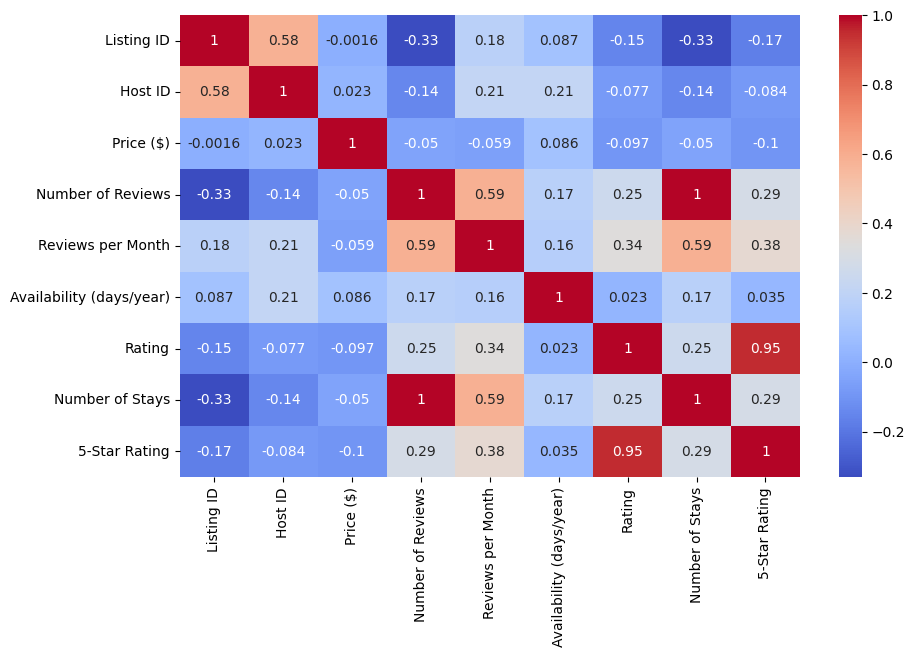

In [45]:
#Correlation Matrix
corr = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

We could use a correlation matrix to see if there is a strong correlation between categories. Some of the categories do not matter like listing_id and host_id. There does not seem to be correlation between price and any of the other numerical variable. I'm going to choose location, room type, and availability per year. 

Location: The location of the airbnb can impact the price of Airbnb listing. For example, listings in Manhattan could be more expensive than those in Brooklyn thus varying the prediction of the linear regression depending on location. 

Room Type: Depending on whether the room is private, an entire home/apt, or a shared room would vary the price of the listing. This is because space and privacy could play a big part in pricing.  

Availability per year: Availabilty per year could be an indicator of the demand or the type of host the listing belongs to which could influence the pricing of the listing. Although the correlation is not strong I still want to explore this feature. 

Apply a linear regression model to predict nightly prices in python, using sklearn.
Report the mean square error and residual value. 
Visualize the predicted vs. actual prices of the dataset. 


In [ ]:
# One-hot encoding using pandas
df = pd.get_dummies(df)

# Display the first few rows
df.head()

In [ ]:
# Drop columns containing "Coordinates" in their title
df = df.drop(columns=[col for col in df.columns if 'Coordinates' in col])

# Display the updated DataFrame (optional)
df.head()

In [ ]:
# Drop columns containing "Listing Name" in their title
df = df.drop(columns=[col for col in df.columns if 'Listing Name' in col])

# Display the updated DataFrame (optional)
df.head()

In [ ]:
feature_1 = [c for c in df.columns if 'Neighborhood' in c]

feature_2 = [c for c in df.columns if 'Room Type' in c]

feature_3 = [c for c in df.columns if 'Availability (days/year)' in c]

In [ ]:
# Define features (X) and target (y)
X = df[feature_1 + feature_2 + feature_3] 
y = df['Price ($)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

In [ ]:
# Create a new target variable 'y_new' based on the condition
y_new = y.copy()
y_new = np.where(y_new <= 1000, y_new, 0)

# Now use y_new as your target variable in the model training.  For example:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, random_state=42)

In [ ]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

Problem 1.2. Supervised learning: analysis. Discuss the findings and results above. 
Discuss the results and performance above. What is effective about this model? What is not so effective? How does it complement other tools we have studied in class? 


Problem 1.3. Unsupervised learning: model development. Use K-means clustering to describe the AirBnB dataset and look for patterns in the data. 
Select features to examine and justify your choices. 
Perform K means Clustering to cluster the dataset (Hint: Experiment with different numbers of clusters and determine the optimal number using methods like the elbow method or silhouette analysis)
Interpret the resulting clusters: What do the clusters represent? Are there patterns in the data that align with the selected features?
Create visualizations to represent the clusters in the dataset


Problem 1.4. Unsupervised learning: analysis. Discuss the findings and results above. 
Discuss the results and performance above. What is effective about this model? What is not so effective? How does it complement other tools we have studied in class?


Problem 2.1. Discuss how the results developed above compare and contrast to existing frameworks, tools, and techniques we have discussed in class and other classes. Address at least each of the following - others and more are welcome: 
Inference Testing / A/B Testing
Clustering and theming interview insights and data
Design Justice and Equity-Centered Design
Futures thinking 


Problem 3.1: Applying Additional Supervised Learning Methods:
In addition to the Linear Regression model used in Problem 1.1, explore the dataset further by applying Random Forest Regression for price prediction.
Use Logistic Regression to perform classification on the dataset. You are free to choose any feature(s) as the target for classification.
Report and compare the results of each model, including key metrics such as accuracy, mean squared error, or any other relevant performance measures.


Random Forest Regression

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define features (X) and target (y)
# Using 'Price ($)' as a target for classification.  Create binary target:
# Price above $1000 is classified as 1 else 0.
X = df.drop('Price ($)', axis=1)
y = (df['Price ($)'] > 1000).astype(int)  # 1 if price > 1000, 0 otherwise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000) # Increased max_iter to ensure convergence
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))